# **Pra Proses Data**

**Deteksi Outlier dan Clustering**

1. Dataset menggunakan iris-full.csv
2. Install Library
Buka Anaconda Prompt lalu mengetikkan:

```
pip install pycaret pandas

```
3. Proses dataset
Temukan outlier data iris menggunakan K-NN dan lakukan clustering dengan K-mean.

tapi sebelum itu pastikan path interpreter Python sama dengan Power BI

In [1]:
import sys
print(sys.executable)


c:\Users\Asus\anaconda3\envs\pycaret-env\python.exe


Dikarenakan di versi PyCaret 3.x tidak ada function get_outliers() dan get_clusters() langsung di modul, maka menggunakan assign_model(model) untuk menghasilkan dataframe dengan kolom tambahan (Anomaly, Anomaly_Score, Cluster).

In [4]:
import pandas as pd
from pycaret.anomaly import setup as ano_setup, create_model as ano_create, assign_model as ano_assign
from pycaret.clustering import setup as clu_setup, create_model as clu_create, assign_model as clu_assign

# 1. Load dataset
dataset = pd.read_csv("iris-full.csv")

# Buang label dulu supaya unsupervised jalan (PyCaret ga butuh target di anomaly/cluster)
if "Class" in dataset.columns:
    dataset_nolabel = dataset.drop(columns=["Class"])
else:
    dataset_nolabel = dataset.copy()

# -------------------------------------------------------
# 2. Outlier Detection (KNN)
ano_setup(data=dataset_nolabel, session_id=123, normalize=True, verbose=False)
knn = ano_create('knn')               # model KNN anomaly
dataset_out = ano_assign(knn)         # tambahkan kolom 'Anomaly'

print("🔎 Outlier detection selesai")
print(dataset_out.head())

# -------------------------------------------------------
# 3. Clustering (KMeans)
clu_setup(data=dataset_nolabel, session_id=123, normalize=True, verbose=False)
kmeans = clu_create('kmeans')         # model KMeans
dataset_clu = clu_assign(kmeans)      # tambahkan kolom 'Cluster'

print("\n📊 Clustering selesai")
print(dataset_clu.head())

# -------------------------------------------------------
# 4. Gabungkan hasil outlier + cluster ke dataset asli
dataset_final = dataset.copy()
dataset_final["Anomaly"] = dataset_out["Anomaly"]
dataset_final["Cluster"] = dataset_clu["Cluster"]

print("\n✅ Dataset final (dengan Outlier & Cluster):")
print(dataset_final.head())


🔎 Outlier detection selesai
   id  sepal length  sepal width  petal length  petal width  Anomaly  \
0   1           5.1          3.5           1.4          0.2        0   
1   2           4.9          3.0           1.4          0.2        0   
2   3           4.7          3.2           1.3          0.2        0   
3   4           4.6          3.1           1.5          0.2        0   
4   5           5.0          3.6           1.4          0.2        0   

   Anomaly_Score  
0       0.634739  
1       0.578645  
2       0.548796  
3       0.538036  
4       0.557574  


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4094,197.1841,0.9425,0,0,0



📊 Clustering selesai
   id  sepal length  sepal width  petal length  petal width    Cluster
0   1           5.1          3.5           1.4          0.2  Cluster 1
1   2           4.9          3.0           1.4          0.2  Cluster 1
2   3           4.7          3.2           1.3          0.2  Cluster 1
3   4           4.6          3.1           1.5          0.2  Cluster 1
4   5           5.0          3.6           1.4          0.2  Cluster 1

✅ Dataset final (dengan Outlier & Cluster):
   id        Class  sepal length  sepal width  petal length  petal width  \
0   1  Iris-setosa           5.1          3.5           1.4          0.2   
1   2  Iris-setosa           4.9          3.0           1.4          0.2   
2   3  Iris-setosa           4.7          3.2           1.3          0.2   
3   4  Iris-setosa           4.6          3.1           1.5          0.2   
4   5  Iris-setosa           5.0          3.6           1.4          0.2   

   Anomaly    Cluster  
0        0  Cluster 1  
1 

Ini hasil dari Anomaly dan Cluster.

In [3]:
import pandas as pd
from pycaret.anomaly import setup as ano_setup, create_model as ano_create, assign_model as ano_assign
from pycaret.clustering import setup as clu_setup, create_model as clu_create, assign_model as clu_assign

# 1. Load dataset Iris
dataset = pd.read_csv("iris-full.csv")  # pastikan file iris.csv ada di folder kerja
dataset_nolabel = dataset.drop(columns=["Class"], errors="ignore")

# ===============================
# 2. Outlier Detection (KNN)
# ===============================
ano_setup(data=dataset_nolabel, session_id=123, normalize=True)
knn = ano_create("knn")
dataset_outlier = ano_assign(knn)   # hasil outlier ditambah ke dataframe

# ===============================
# 3. Clustering (KMeans)
# ===============================
clu_setup(data=dataset_nolabel, session_id=123, normalize=True)
kmeans = clu_create("kmeans", num_clusters=3)
dataset_cluster = clu_assign(kmeans)   # hasil cluster ditambah ke dataframe

# ===============================
# 4. Gabungkan hasil Outlier + Cluster
# ===============================
final = pd.concat([dataset, 
                   dataset_outlier[["Anomaly"]], 
                   dataset_cluster[["Cluster"]]], axis=1)

# Simpan ke CSV
final.to_csv("iris_outlier_cluster.csv", index=False)

print("✅ File iris_outlier_cluster.csv berhasil dibuat!")


,Description,Value
0,Session id,123
1,Original data shape,"(150, 5)"
2,Transformed data shape,"(150, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Description,Value
0,Session id,123
1,Original data shape,"(150, 5)"
2,Transformed data shape,"(150, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4529,237.8420,0.8966,0,0,0


✅ File iris_outlier_cluster.csv berhasil dibuat!


4. Visualisasi Power BI

Setelah selesai Dataset baru dibuat untuk selanjutnya di proses di Power BI lengkap dengan lengkap dengan Anomaly dan Cluster dengan cara: 

    1. Load Data

* Buka Power BI Desktop

* Klik Get Data → Text/CSV → pilih iris_result.csv

* Klik Load

    2. Scatter Plot (Clustering)

* Pilih Visualizations → Scatter Chart

* Atur field:

X-Axis: sepal_length

Y-Axis: sepal_width (atau bisa coba petal_length vs petal_width)

Legend / Color: Cluster

Size: bisa pakai petal_length biar ada variasi ukuran

* Hasil → Titik-titik iris akan berwarna sesuai cluster hasil KMeans.

    3. Highlight Outliers

* Masih di scatter plot yang sama

* Tambahkan filter pada kolom Anomaly:

0 → data normal (inlier)

1 → data outlier

    4. Table View (Detail Outlier)

* Tambah Table dari visualizations

* Masukkan field: sepal_length, sepal_width, petal_length, petal_width, Cluster, Anomaly, Anomaly_Score.

* Aktifkan Filter untuk Anomaly = 1 → supaya tabel hanya menampilkan data outlier.

    5. Ringkasan Cluster

* Tambahkan Pie Chart atau Donut Chart

* Field:

Legend: Cluster

Values: count of rows (jumlah data tiap cluster).

    6. Dashboard Lengkap

* Kiri atas → Scatter plot (Cluster vs fitur)

* Kanan atas → Pie chart (proporsi cluster)

* Bawah → Tabel outlier (detail data aneh)

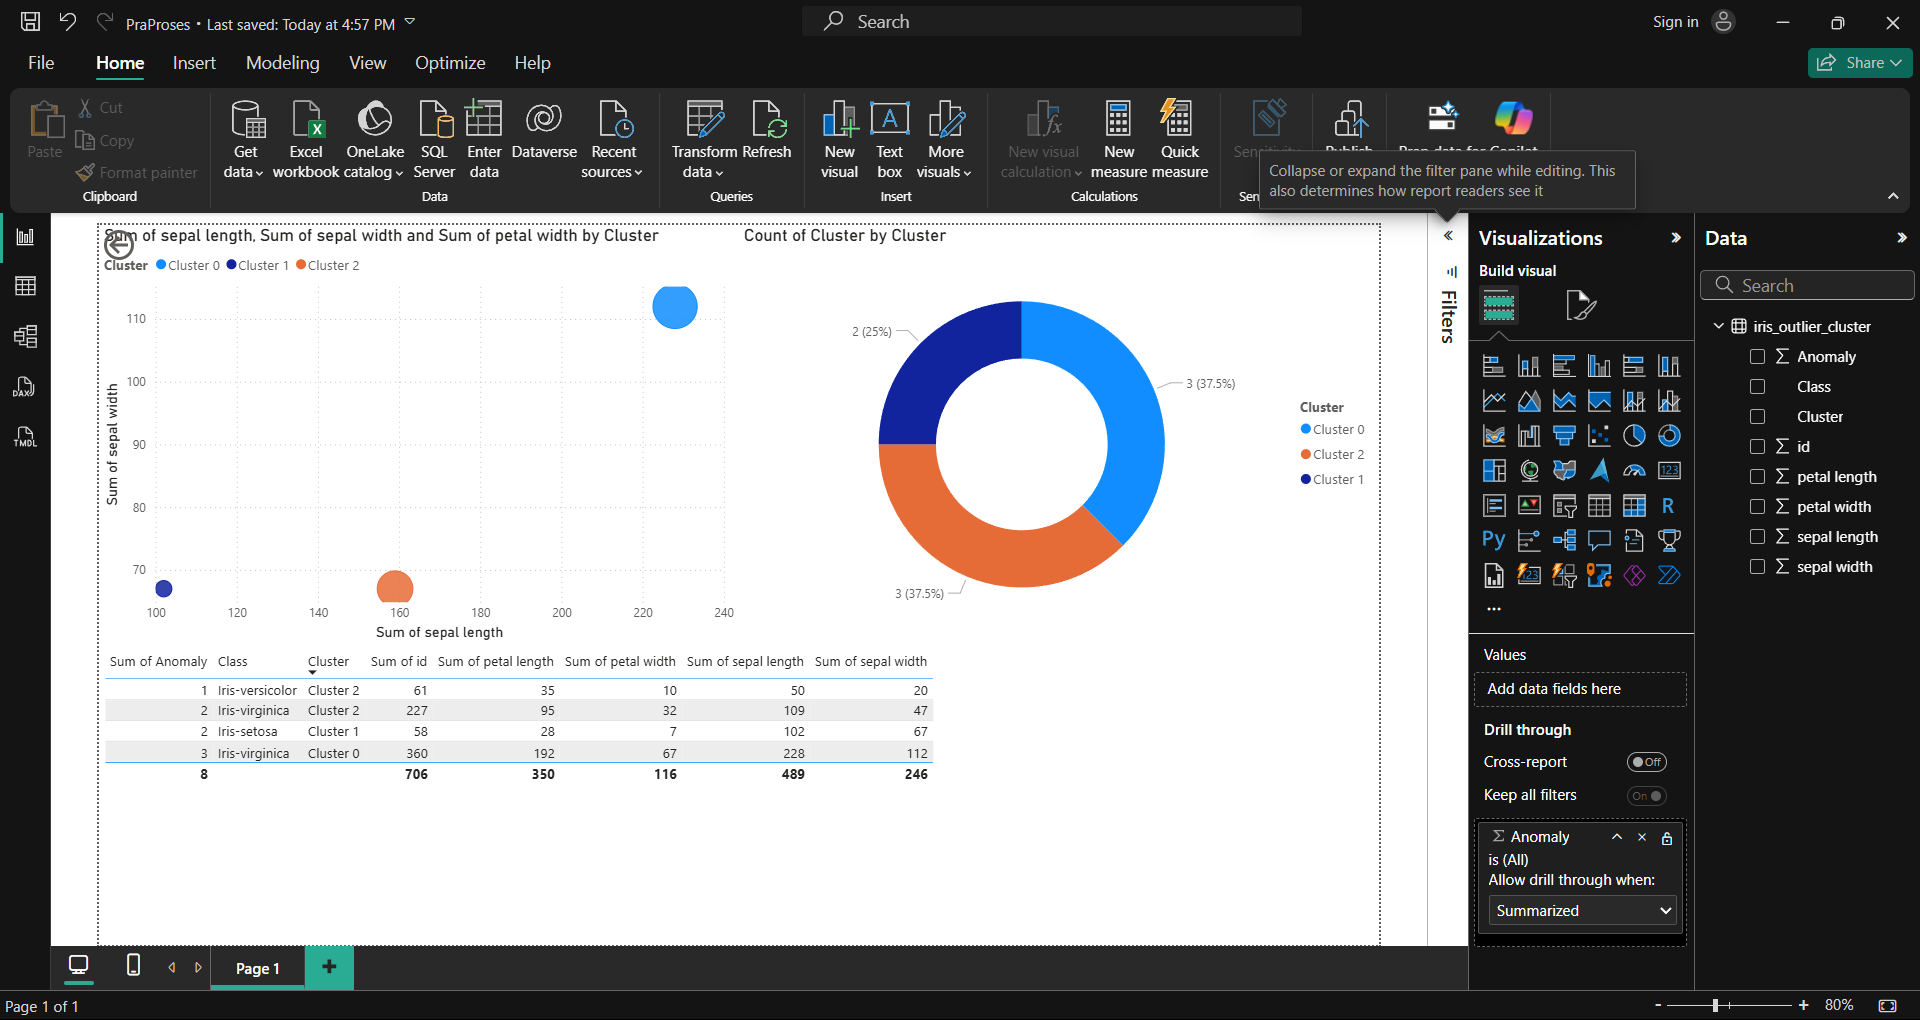